<h1>FIFA 23 ML Project</h1>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("./players_fifa23_cleaned.csv")
data.head()

,Name,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,BestPosition,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,L. Messi,35,169,67,91,91,0,2190,452,0,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,34,185,81,91,91,0,2147,455,1,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,33,185,81,91,91,0,2205,458,2,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,31,181,70,91,91,0,2303,483,3,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,23,182,73,91,95,4,2177,470,2,...,92,84,92,70,66,70,66,57,66,21


In [4]:
data.shape

(18447, 80)

In [5]:
X = data.drop(["Name", "BestPosition"], axis = 1)
Y = pd.DataFrame(data["BestPosition"])

<h3>Handle the Imbalanced Data:</h3>

<AxesSubplot:xlabel='BestPosition', ylabel='count'>

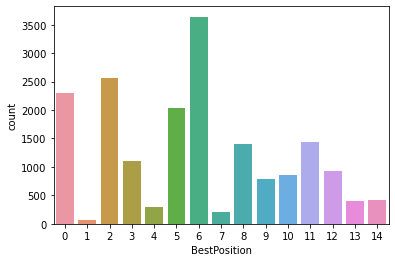

In [6]:
sns.countplot(x="BestPosition", data = Y)

In [7]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(X, Y)

In [8]:
print(f' X_shape: {X.shape} \n y_shape: {Y.shape}')

 X_shape: (54600, 78) 
 y_shape: (54600, 1)


<AxesSubplot:xlabel='BestPosition', ylabel='count'>

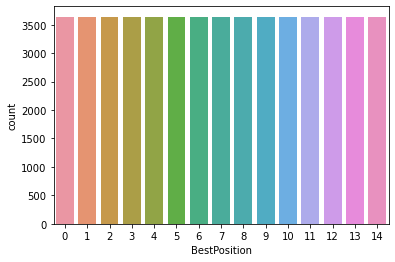

In [9]:
sns.countplot(x="BestPosition", data = Y)

<h3>Feature Scaling:</h3>

In [10]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X = mms.fit_transform(X)

<h3>Perform Dimentionality Reduction:</h3>

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 39) # Reduce the Dimention of the Data to its half
X = pd.DataFrame(pca.fit_transform(X))

<h3>Split the Data to Train and Test sets:</h3>

In [12]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.20, random_state=42)

<h2>Modeling</h2>

<h3>A. Predict the Position of the Player Using 8 Classification Algorithms:</h3>

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Function to check the classification report
def classification_report_fun(model_name, actual, predicted):
    print(f'The Classification Report for {model_name} Classifier:')
    print(classification_report(actual, predicted))

models_names = []
models_scores = []

<h3>1. Logistic Regression:</h3>

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [15]:
lr.fit(X_Train , Y_Train)

LogisticRegression()

In [16]:
lr.score(X_Train, Y_Train)

0.7731227106227107

In [17]:
lr.score(X_Test, Y_Test)

0.7741758241758242

In [18]:
Y_Pred_lr = lr.predict(X_Test)

In [19]:
models_names.append("Logistic Regression")
models_scores.append(lr.score(X_Test, Y_Test))

In [20]:
classification_report_fun("Logistic Regression", Y_Test, Y_Pred_lr)

The Classification Report for Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       704
           1       0.85      0.96      0.90       740
           2       0.95      0.90      0.92       692
           3       0.82      0.92      0.87       700
           4       0.56      0.53      0.54       720
           5       1.00      1.00      1.00       764
           6       0.96      0.92      0.94       721
           7       0.57      0.58      0.57       755
           8       0.89      0.90      0.90       727
           9       0.68      0.65      0.67       745
          10       0.71      0.72      0.72       745
          11       0.73      0.69      0.71       734
          12       0.68      0.67      0.68       701
          13       0.70      0.73      0.71       730
          14       0.70      0.73      0.71       742

    accuracy                           0.77     10920
   macro avg      

<h3>2. Random Forest:</h3>

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',n_estimators=100)

In [22]:
rf.fit(X_Train, Y_Train)

RandomForestClassifier()

In [23]:
rf.score(X_Train, Y_Train)

1.0

In [24]:
rf.score(X_Test, Y_Test)

0.9092490842490842

In [25]:
Y_Pred_rf = rf.predict(X_Test)

In [26]:
models_names.append("Random Forest")
models_scores.append(rf.score(X_Test, Y_Test))

In [27]:
classification_report_fun("Random Forest", Y_Test, Y_Pred_rf)

The Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       704
           1       0.98      1.00      0.99       740
           2       0.95      0.92      0.94       692
           3       0.82      0.92      0.87       700
           4       0.90      0.97      0.93       720
           5       1.00      1.00      1.00       764
           6       0.96      0.87      0.91       721
           7       0.95      0.96      0.96       755
           8       0.87      0.89      0.88       727
           9       0.84      0.87      0.86       745
          10       0.90      0.92      0.91       745
          11       0.85      0.78      0.81       734
          12       0.90      0.92      0.91       701
          13       0.92      0.96      0.94       730
          14       0.92      0.96      0.94       742

    accuracy                           0.91     10920
   macro avg       0.91 

<h3>3. XGB:</h3>

In [28]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

In [29]:
xgb.fit(X_Train, Y_Train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [30]:
xgb.score(X_Train, Y_Train)

0.9998855311355311

In [31]:
xgb.score(X_Test, Y_Test)

0.9220695970695971

In [32]:
Y_Pred_xgb = xgb.predict(X_Test)

In [33]:
models_names.append("XGB")
models_scores.append(xgb.score(X_Test, Y_Test))

In [34]:
classification_report_fun("XGB", Y_Test, Y_Pred_xgb)

The Classification Report for XGB Classifier:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       704
           1       0.98      1.00      0.99       740
           2       0.98      0.94      0.96       692
           3       0.89      0.93      0.91       700
           4       0.91      0.97      0.94       720
           5       1.00      1.00      1.00       764
           6       0.97      0.91      0.93       721
           7       0.93      0.97      0.95       755
           8       0.91      0.93      0.92       727
           9       0.87      0.87      0.87       745
          10       0.93      0.90      0.91       745
          11       0.86      0.82      0.84       734
          12       0.90      0.89      0.90       701
          13       0.91      0.97      0.94       730
          14       0.90      0.95      0.93       742

    accuracy                           0.92     10920
   macro avg       0.92      0.92 

<h3>4. Decision Tree:</h3>

In [35]:
from sklearn.tree  import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_features = 39,max_depth = 12)

In [36]:
dt.fit(X_Train, Y_Train)

DecisionTreeClassifier(max_depth=12, max_features=39)

In [37]:
dt.score(X_Train, Y_Train)

0.7515338827838828

In [38]:
dt.score(X_Test, Y_Test)

0.6684981684981685

In [39]:
Y_Pred_dt = dt.predict(X_Test)

In [40]:
models_names.append("Decision Tree")
models_scores.append(dt.score(X_Test, Y_Test))

In [41]:
classification_report_fun("Decision Tree", Y_Test, Y_Pred_dt)

The Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.55      0.42      0.47       704
           1       0.83      0.87      0.85       740
           2       0.83      0.73      0.77       692
           3       0.66      0.67      0.66       700
           4       0.53      0.62      0.57       720
           5       1.00      1.00      1.00       764
           6       0.86      0.80      0.83       721
           7       0.60      0.65      0.63       755
           8       0.67      0.69      0.68       727
           9       0.60      0.54      0.57       745
          10       0.63      0.58      0.60       745
          11       0.53      0.49      0.51       734
          12       0.57      0.54      0.55       701
          13       0.61      0.73      0.67       730
          14       0.58      0.67      0.62       742

    accuracy                           0.67     10920
   macro avg       0.67 

<h3>5. Adaboost:</h3>

In [42]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

In [43]:
ada.fit(X_Train, Y_Train)

AdaBoostClassifier()

In [44]:
ada.score(X_Train, Y_Train)

0.13340201465201465

In [45]:
ada.score(X_Test, Y_Test)

0.13333333333333333

In [46]:
Y_Pred_ada = dt.predict(X_Test)

In [47]:
models_names.append("Adaboost")
models_scores.append(ada.score(X_Test, Y_Test))

In [48]:
classification_report_fun("Adaboost", Y_Test, Y_Pred_ada)

The Classification Report for Adaboost Classifier:
              precision    recall  f1-score   support

           0       0.55      0.42      0.47       704
           1       0.83      0.87      0.85       740
           2       0.83      0.73      0.77       692
           3       0.66      0.67      0.66       700
           4       0.53      0.62      0.57       720
           5       1.00      1.00      1.00       764
           6       0.86      0.80      0.83       721
           7       0.60      0.65      0.63       755
           8       0.67      0.69      0.68       727
           9       0.60      0.54      0.57       745
          10       0.63      0.58      0.60       745
          11       0.53      0.49      0.51       734
          12       0.57      0.54      0.55       701
          13       0.61      0.73      0.67       730
          14       0.58      0.67      0.62       742

    accuracy                           0.67     10920
   macro avg       0.67      

<h3>6. light GBM:</h3>

In [49]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(max_depth = 15)

In [50]:
lgbm.fit(X_Train, Y_Train)

LGBMClassifier(max_depth=15)

In [51]:
lgbm.score(X_Train, Y_Train)

0.9984203296703297

In [52]:
lgbm.score(X_Test, Y_Test)

0.9108058608058608

In [53]:
Y_Pred_lgbm = lgbm.predict(X_Test)

In [54]:
models_names.append("light GBM")
models_scores.append(lgbm.score(X_Test, Y_Test))

In [55]:
classification_report_fun("light GBM", Y_Test, Y_Pred_lgbm)

The Classification Report for light GBM Classifier:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       704
           1       0.99      1.00      1.00       740
           2       0.98      0.93      0.95       692
           3       0.87      0.93      0.90       700
           4       0.88      0.95      0.91       720
           5       1.00      1.00      1.00       764
           6       0.96      0.91      0.94       721
           7       0.92      0.96      0.94       755
           8       0.91      0.91      0.91       727
           9       0.84      0.84      0.84       745
          10       0.92      0.89      0.91       745
          11       0.84      0.79      0.81       734
          12       0.89      0.87      0.88       701
          13       0.90      0.95      0.93       730
          14       0.89      0.95      0.92       742

    accuracy                           0.91     10920
   macro avg       0.91     

<h3>7. CatBoost:</h3>

In [60]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(max_depth = 10, iterations=5, learning_rate=0.3)

In [61]:
cb.fit(X_Train, Y_Train)

0:	learn: 1.7988196	total: 1.38s	remaining: 5.5s
1:	learn: 1.5251926	total: 2.71s	remaining: 4.06s
2:	learn: 1.3455509	total: 4.06s	remaining: 2.71s
3:	learn: 1.2230258	total: 5.45s	remaining: 1.36s
4:	learn: 1.1191321	total: 6.79s	remaining: 0us


In [62]:
cb.score(X_Train, Y_Train)

0.6557692307692308

In [63]:
cb.score(X_Test, Y_Test)

0.6382783882783882

In [64]:
Y_Pred_cb = cb.predict(X_Test)

In [65]:
models_names.append("CatBoost")
models_scores.append(cb.score(X_Test, Y_Test))

In [66]:
classification_report_fun("CatBoost", Y_Test, Y_Pred_cb)

The Classification Report for CatBoost Classifier:
              precision    recall  f1-score   support

           0       0.55      0.44      0.49       704
           1       0.64      0.77      0.70       740
           2       0.75      0.74      0.75       692
           3       0.62      0.69      0.65       700
           4       0.50      0.47      0.48       720
           5       1.00      1.00      1.00       764
           6       0.85      0.81      0.83       721
           7       0.56      0.51      0.53       755
           8       0.66      0.67      0.67       727
           9       0.57      0.51      0.54       745
          10       0.62      0.63      0.62       745
          11       0.50      0.44      0.47       734
          12       0.58      0.56      0.57       701
          13       0.58      0.67      0.62       730
          14       0.57      0.65      0.60       742

    accuracy                           0.64     10920
   macro avg       0.64      

<h3>8. KNN:</h3>

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 8)

In [68]:
knn.fit(X_Train, Y_Train)

KNeighborsClassifier(n_neighbors=8)

In [69]:
knn.score(X_Train, Y_Train)

0.8526785714285714

In [70]:
knn.score(X_Test, Y_Test)

0.8047619047619048

In [71]:
Y_Pred_knn = cb.predict(X_Test)

In [72]:
models_names.append("KNN")
models_scores.append(knn.score(X_Test, Y_Test))

In [73]:
classification_report_fun("KNN", Y_Test, Y_Pred_knn)

The Classification Report for KNN Classifier:
              precision    recall  f1-score   support

           0       0.55      0.44      0.49       704
           1       0.64      0.77      0.70       740
           2       0.75      0.74      0.75       692
           3       0.62      0.69      0.65       700
           4       0.50      0.47      0.48       720
           5       1.00      1.00      1.00       764
           6       0.85      0.81      0.83       721
           7       0.56      0.51      0.53       755
           8       0.66      0.67      0.67       727
           9       0.57      0.51      0.54       745
          10       0.62      0.63      0.62       745
          11       0.50      0.44      0.47       734
          12       0.58      0.56      0.57       701
          13       0.58      0.67      0.62       730
          14       0.57      0.65      0.60       742

    accuracy                           0.64     10920
   macro avg       0.64      0.64 

<h3>Compare the 8 Classification Algorithms:</h3>

In [74]:
comp = pd.DataFrame()
comp['name'] = models_names
comp['score'] = models_scores
comp

,name,score
0,Logistic Regression,0.774176
1,Random Forest,0.909249
2,XGB,0.922070
3,Decision Tree,0.668498
4,Adaboost,0.133333
5,light GBM,0.910806
6,CatBoost,0.638278
7,KNN,0.804762


In [75]:
cm = sns.light_palette("green", as_cmap=True)
s = comp.style.background_gradient(cmap=cm)
s

,name,score
0,Logistic Regression,0.774176
1,Random Forest,0.909249
2,XGB,0.922070
3,Decision Tree,0.668498
4,Adaboost,0.133333
5,light GBM,0.910806
6,CatBoost,0.638278
7,KNN,0.804762


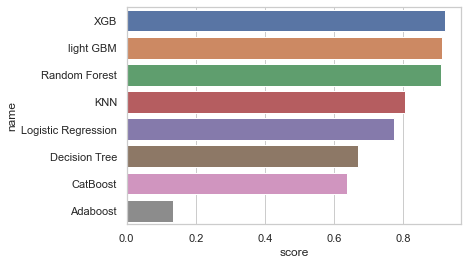

In [76]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=comp.sort_values(by="score", ascending=False))